# Tutorial 5: standard and flared traffic lights
_____________________________________________________________________________________

## Overview:
In this tutorial we follow the same recipe as in the last two tutorials. We introduce both types of traffic lights - standard and flared. 


In [1]:
import __basik__ as bk

/home/dylan/Documents/Basik_Tutorial/__basik__/__init__.py:37: UserWarning: __basik__ has picked up that it is currently being run from within a Ipython or Jupyter Notebook. Display components requireQtA5gg to render. Most Ipython-based interactive notebooks havetheir kernel shut down when using QtA5gg as a Matplotlib backend. Hence, __basik__ will not use QtA5gg. As a result, please refrain from using __basik__ display components while in the Ipython or Jupyter Notebook environment. If display components are required, please use Ipython in a console. The Spyder IDE for Python is highly recommended.
  warnings.warn(message)


Importing matplotlib.pyplot as plt



## The two variants
We discuss how a traffic light functions in general. Lanes of incoming traffic intersect at the traffic light. The traffic light allows vehicles to pass onto an lane that permits outgoing traffic. The outgoing lane is determined by the choice that a vehicle makes. This choice is based on the vehicle's destination. When a light is red, vehicles must stop and form a queue. Hence stationary vehicles can be found in what is referred to as the buffer. If the light is green, vehicles are allowed passage (served by the traffic light). A vehicles can usually turn left, proceed forward or turn right. Left turns and proceeding forward pose no problem to a vehicle. However, a right turn may be blocked depending on the scenario. This is because executing a right turn requires the vehicle to cross a flow of oncoming vehicles. In the setting of a standard green light, a vehicle must usually wait until the oncoming flow has dried up or allowed a large enough gap for it to cross the flow while avoiding a collision. If a green right turn arrow is present, the vehicle is allowed a right turn without any issues. 

The two variants of traffic lights differ in how they deal with the vehicles that would like to perform a right turn.
1. **Standard traffic light**: there is a single buffer for each direction. The vehicle at the fornt of the buffer is served by the traffic light. The subsequent vehicles must wait for it to be served before they can move along the buffer until they may be served. This is essentially a first-come-first-serve discipline (FCFS) in terms of queing theory. If the front vehicle being served would like to execute a right turn during a standard green light (no right arrow) then the entire buffer has its progress halted unitl the front vehicle is able to execute the right turn. This may lead to congestion issues. The traffic lights are usually smaller that its flared cousing and are cheaper to construct a well. However, due to its possible inefficiencies it is usually reserved for areas with low traffic load ($\rho$ where $\rho = \frac{\mbox{arrival rate}}{\mbox{service rate}} = \frac{\lambda}{\mu}$.
2. **Flared traffic light**: A lane of incoming traffic splits into two buffers. The left buffer is intended for left turns and proceeding forward. The right buffer is reserved for right turn vehicles. This provides a solution for the wasteful hold-up caused by a halted right turn vehicle in the single buffer FCFS discipline. 



## Traffic light schedules
A traffic light is essentially a multi-buffer single non-preemptive server queue with switching costs (a delay is incurred when changing a traffic light signal). It is intended to regulate or even optimise traffic flow. Hence, it usually follows a policy: a set of traffic light sequences to execute. This policy may be adpative and depend on the state of various objects in the queue such as buffer lenght. However, this is usually not the case. Adaptive traffic light rarely exist. Most follow a fixed sequence traffic light signals to execute. This sequence is referred to as a cycle. It repeats this cycle until its policy changes (if it ever does). Hence, the term fixed-cyle (FC) traffic light is used. The traffic lights in `__basik__` are FC by default. However, we do allow for the sequence of signals to be randomly shuffled (a random policy). 

In `__basik__` we have to specify this sequence of signals in the form of a list. A signal is created by using one of the functions in `__basik__.FlowFunctions`. For the standard traffic light we would use functions in `__basik__.FlowFunctions.non_flared` and for the flared traffic light we would use functions in `__basik__.FlowFunctions.flared`. These functions are all very well documented and easy to understand. We present their documentation below.

#### Flared Traffic light signals (flow functions)

In [2]:
help(bk.FlowFunctions.flared)

Help on module __basik__.FlowFunctions.flared in __basik__.FlowFunctions:

NAME
    __basik__.FlowFunctions.flared

DESCRIPTION
    A collection of functions intended to be put into a list to produce a 
    schedule for a flared traffic light to follow.
    
    Please consult __all__ for a list of all 8 available functions. Each functions
    has documentation.

FUNCTIONS
    E_flow(duration, tpm=array([[0.  , 0.25, 0.5 , 0.25],
           [0.25, 0.  , 0.25, 0.5 ],
           [0.5 , 0.25, 0.  , 0.25],
           [0.25, 0.5 , 0.25, 0.  ]]))
        Only flow from the Eastern entrance is permitted.
        It can flow to any of the other exits except East.
        
        Parameters:
        -----------
        duration: float
            A value in seconds of how long this state of the traffic light will
            last i.e. how long the signal will last.
        tpm: dict or numpy.ndarray
            This dictates the dynamic/choices that occurs when vehicles move from a
           

#### Non-Flared Traffic light signals (flow functions)

In [3]:
help(bk.FlowFunctions.non_flared)

Help on module __basik__.FlowFunctions.non_flared in __basik__.FlowFunctions:

NAME
    __basik__.FlowFunctions.non_flared

DESCRIPTION
    A collection of functions intended to be put into a list to produce a 
    schedule for a traffic light to follow.
    
    Please consult __all__ for a list of all 8 available functions. Each functions
    has documentation.

FUNCTIONS
    E_flow(duration: float, prob_E_S: float, prob_E_W: float, prob_E_N: float)
        Only flow from the Eastern entrance is permitted.
        It can flow to any of the other exits except East.
        
        Parameters:
        -----------
        duration: float
            A value in seconds of how long this state of the traffic light will
            last.
        prob_E_S: float
            Left turn.
        prob_E_W: float
            Move forward.
        prob_E_N: float
            Right turn.
            
        Raises:
        -------
        AssertionError:
            Probability values are not val

## Examples
We will first build a grid of four inflow and outflow lanes. The traffic lights can the be set up separately and placed in the middle. This sames time and space.

#### Build the Grid

DISPLAY OFF
Setting up simulation...


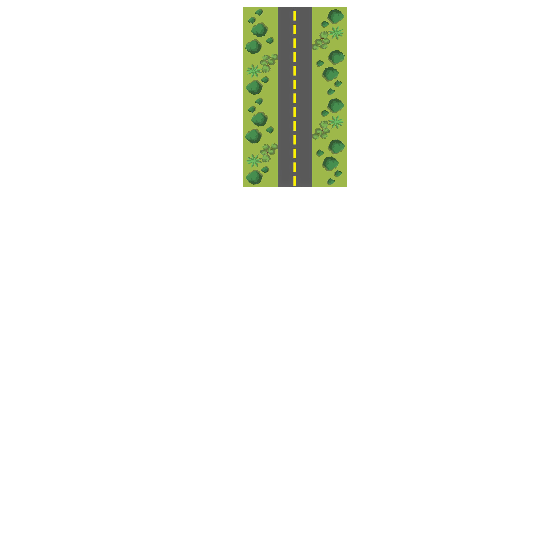

Scheduling Northern arrivals...
..done!
Scheduling Eastern arrivals...
..done!
Scheduling Southern arrivals...
..done!
Scheduling Western arrivals...
..done!


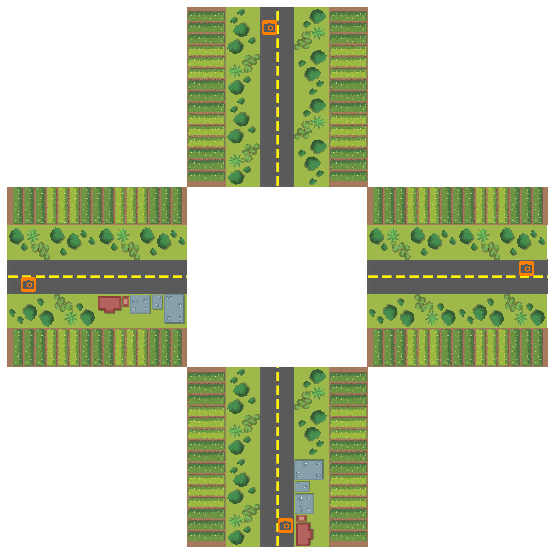

In [4]:
bk.VehicleDisplay.speed_up_factor = 10
bk.Vehicle.frames_per_move = 2
import numpy as np
bk.VehicleDisplay.SHOW = False # TURN OFF
print('DISPLAY OFF')
print('Setting up simulation...')
np.random.seed(123)
fig,ax = bk.axes_grid(3,3,scale=2.5)  
end_time = 21
lane_length = 5 
bk.Queue.clear()
# North:
Nlane_in = bk.Lane(lane_length) 
Nlane_out = bk.Lane(lane_length) 
NDisplay = bk.RoadDisplay(left_lane=Nlane_out,
                          right_lane=Nlane_in,
                          axes=ax[0,1],
                          horizontal=False)
Nrate = {end_time:bk.Rate(0.1)} 
Nsource = bk.Source(vehicle_velocity = 16.67,  
                    target_node = Nlane_in.IN,
                    rate_schedule=Nrate)
print('Scheduling Northern arrivals...')
Nsource.setup_arrivals(end_time)
print('..done!')
Nrecord = bk.Record(Nlane_out.OUT)
# East 
Elane_in = bk.Lane(lane_length) 
Elane_out = bk.Lane(lane_length) 
EDisplay = bk.RoadDisplay(left_lane=Elane_out,
                          right_lane=Elane_in,
                          axes=ax[1,2],
                          horizontal=True)
Erate = {end_time:bk.Rate(0.1)} 
Esource = bk.Source(vehicle_velocity = 16.67,  
                    target_node = Elane_in.IN,
                    rate_schedule=Erate)
print('Scheduling Eastern arrivals...')
Esource.setup_arrivals(end_time)
print('..done!')
Erecord = bk.Record(Elane_out.OUT)  
# South
Slane_in = bk.Lane(lane_length) 
Slane_out = bk.Lane(lane_length) 
SDisplay = bk.RoadDisplay(left_lane=Slane_in,
                          right_lane=Slane_out,
                          axes=ax[2,1],
                          horizontal=False)
Srate = {end_time:bk.Rate(0.1)} 
Ssource = bk.Source(vehicle_velocity = 16.67, 
                    target_node = Slane_in.IN,
                    rate_schedule=Srate)
print('Scheduling Southern arrivals...')
Ssource.setup_arrivals(end_time)
print('..done!')
Srecord = bk.Record(Slane_out.OUT)  
# West
Wlane_in = bk.Lane(lane_length) 
Wlane_out = bk.Lane(lane_length)
WDisplay = bk.RoadDisplay(left_lane=Wlane_in,
                          right_lane=Wlane_out,
                          axes=ax[1,0],
                          horizontal=True)
Wrate = {end_time:bk.Rate(0.1)} 
Wsource = bk.Source(vehicle_velocity = 16.67,  # 60 km/h
                    target_node = Wlane_in.IN,
                    rate_schedule=Wrate)
print('Scheduling Western arrivals...')
Wsource.setup_arrivals(end_time)
print('..done!')
Wrecord = bk.Record(Wlane_out.OUT) 
fig

#### Standard traffic light (non-flared)

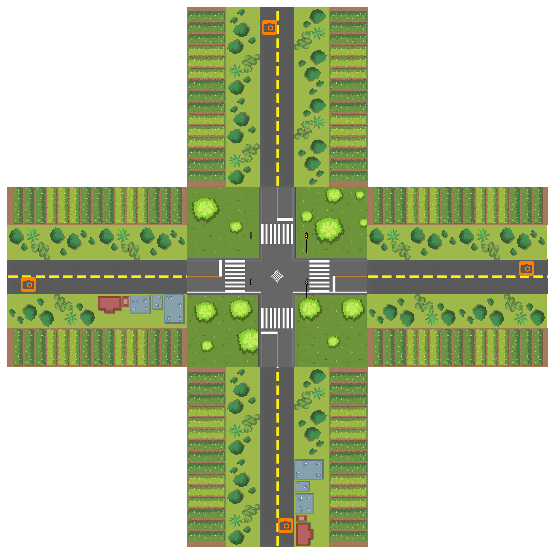

In [5]:
import __basik__.FlowFunctions.non_flared as nf
# Create a sequence of traffic light signals. This can serve as a fixed 
# time-independent policy or a purely random policy that ignores state and time.
cycle = [
         nf.N_flow(10,0.1,0.8,0.1),
         nf.N_S_flow(10,0.8,0.8),
         nf.N_S_overwash(5),
         nf.S_flow(10,0.1,0.8,0.1),
         nf.E_flow(10,0.1,0.8,0.1),
         nf.W_E_flow(10,0.8,0.8),
         nf.W_E_overwash(6),
         nf.W_flow(2,0.1,0.8,0.1)
        ]

in_nodes = {'N':Nlane_in.OUT,'E':Elane_in.OUT,'S':Slane_in.OUT,'W':Wlane_in.OUT}
out_nodes = {'N':Nlane_out.IN,'E':Elane_out.IN,'S':Slane_out.IN,'W':Wlane_out.IN,}
# Create the actual traffic light
trafficlight = bk.TrafficLight(in_nodes=in_nodes,
                               out_nodes=out_nodes,
                               cycle_schedule=cycle)
# NOTE: we need to setup cycles. These are events that are placed into the GlobalQueue or bk.Queue
trafficlight.setup_cycles(end_time*2,fixed_cycle=True)
trafficlightdisplay = bk.TrafficLightDisplay(trafficlight,
                                             show=['N','E','S','W'],
                                             axes=ax[1,1])
fig

#### Flared traffic light

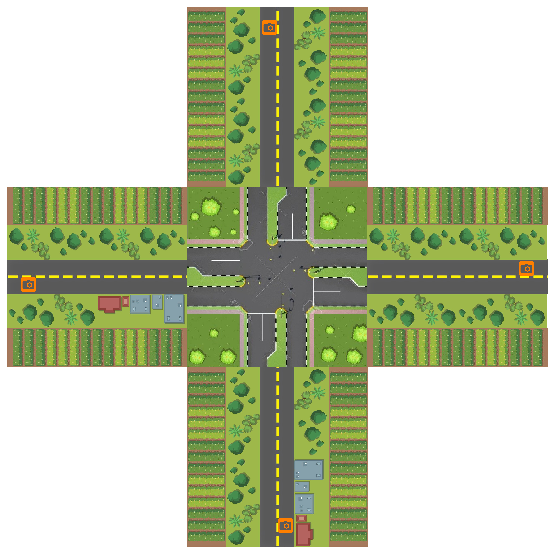

In [6]:
import __basik__.FlowFunctions.flared as fl
cycle = [
         fl.N_flow(3),
         fl.N_S_flow(2),
         fl.N_S_overwash(1),
         fl.S_flow(2),
         fl.E_flow(2),
         fl.W_E_flow(2),
         fl.W_E_overwash(1),
         fl.W_flow(2)
        ]
              
in_nodes = {'N':Nlane_in.OUT,'E':Elane_in.OUT,'S':Slane_in.OUT,'W':Wlane_in.OUT}
out_nodes = {'N':Nlane_out.IN,'E':Elane_out.IN,'S':Slane_out.IN,'W':Wlane_out.IN,}
        
flaredtrafficlight = bk.FlaredTrafficLight(in_nodes=in_nodes,
                                           out_nodes=out_nodes,
                                           cycle_schedule=cycle)
flaredtrafficlight.setup_cycles(end_time*2,fixed_cycle=True)
flaredtrafficlightdisplay = bk.FlaredTrafficLightDisplay(flaredtrafficlight,
                                                         show=['N','E','S','W'],
                                                         axes=ax[1,1])
fig

## Simulation Videos
The traffic lights can be run as in the examples in the preceeding tutorials.
We present the two videos of each simulation as well as where their console scipts can be found if one wishes to replicate the results.

#### Standard traffic light
See `Basik_Tutorial/Console_Scripts/tf_non_flared.py`.

In [7]:
from IPython.display import Video
import os
path = os.getcwd()+'/Videos/non_flared.mp4'
video_width = 900  # 1024 default
video_height = 450  # 576 default
Video(path,embed=True,width=video_width,height=video_height)

#### Flared traffic light
See `Basik_Tutorial/Console_Scripts/ftf_lared.py`.

In [8]:
path = os.getcwd()+'/Videos/flared.mp4'
video_width = 900  # 1024 default
video_height = 450  # 576 default
Video(path,embed=True,width=video_width,height=video_height)